# This notebook consists of code used for segmentation of different parts of the retina.

### Segmentation is very useful for further analysis of any lesions or for grading of Diabetic Retinopathy. 
The blood vessel flow comes in use to know the condition of Neovascularisation(In which some external vessels grow up and cause vision blockage). Red Dots are the initial symtoms of this disease that shouldn't be ignored. Exudates arise if the disease becomes severe and can lead to Neovascularisation.

#### Here I have segmented the blood vessels, exudates and red dots from the retinal fundus photographs having retinopathy.
#### OpenCV consists of many functions that are used for image analysis and helps us to perform different operations on images.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

## 1.) Segmenting Blood Vessels

In [33]:
path_1 = "Messidor_Kaggle/Messidor/train_data/No_DR/"

In [34]:
images = os.listdir(path)

### This function "segment_vessels" takes image as input and generates a series of images corresponding to each step used for segmenation of the vessels.

In [4]:
def segment_vessels(path):
    
    """
    Here we are going to segment the blood vessels by using certain filters.
    
    
    I followed this pipeline to segment the vessels:
    
    1.)  Convert the image from BGR to RGB color scale to view it correctly
    2.)  Extract the green channel from the RGB image as green channel clearly seperates out the vessels and exudates in the 
         retina.
    3.)  Invert the green channel image to pop out the vessels clearly and to supress the optic disc.
    4.)  To smoothen out the image and highlight the intensity rich regions we will apply the CLAHE filter(Contrast Limited
         Adaptive Histogram Equalization)
    5.)  Apply the canny edge detector to detect the edges and intensity variations (gradients/changes in intensity).
    6.)  Subtract the CLAHE image from the edges detetcted by the Canny detector so that all other spots except vessels get 
         reduced.
    7.)  Again invert the image so that certain thresholding can be done.
    8.)  Convert the resulting image to binary image by thresholding certain range of values. Here the vessels lie in around
         65 to 150.
    9.)  Then apply median filtering to the image to remove the noise from the image.
    10.) Then plot the final image in gray scale to view the segmented output.
    """
    
    # Step 1
    image_bgr = cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    # Step 2
    image_g = image_rgb[:,:,1]

    # Step 3
    image_ig = cv2.bitwise_not(image_g)
    
    # Step 4
    clahe = cv2.createCLAHE(clipLimit = 5)
    image_clahe = clahe.apply(image_ig)

    # Step 5
    edges = cv2.Canny(image_clahe,0,200)
    
    # Step 6
    image_reduced = image_clahe - edges
    
    # Step 7
    image_reduced_inverted = 255 - image_reduced
    
    # Step 8
    thresh, image_bw = cv2.threshold(image_reduced_inverted, 65, 150, cv2.THRESH_BINARY)
    image_bw = cv2.threshold(image_reduced_inverted, thresh, 255, cv2.THRESH_BINARY)[1]
    
    # Step 9
    image_final = cv2.medianBlur(image_bw, 3)
    
    # Step 10
    f = plt.figure(figsize=(17,20))
    
    print(" ")
    f.add_subplot(3,3,1)
    plt.title("RGB Image")
    plt.imshow(image_rgb)
    
    f.add_subplot(3,3,2)
    plt.title("Green Channel Image")
    plt.imshow(image_g, cmap="gray")
    
    f.add_subplot(3,3,3)
    plt.title("Inverted Green Channel Image")
    plt.imshow(image_ig, cmap="gray")
    
    f.add_subplot(3,3,4)
    plt.title("CLAHE filtered Image")
    plt.imshow(image_clahe, cmap="gray")
    
    f.add_subplot(3,3,5)
    plt.title("Canny Edge Image")
    plt.imshow(edges, cmap="gray")
    
    f.add_subplot(3,3,6)
    plt.title("(CLAHE - Canny) Image")
    plt.imshow(image_reduced, cmap="gray")
    
    f.add_subplot(3,3,7)
    plt.title("Inverted (CLAHE - Canny) Image")
    plt.imshow(image_reduced_inverted, cmap="gray")
    
    f.add_subplot(3,3,8)
    plt.title("Binary Image")
    plt.imshow(image_bw, cmap="gray")
    
    f.add_subplot(3,3,9)
    plt.title("Median Filtered Binary Image")
    plt.imshow(image_final, cmap="gray")
    
    plt.show()
    

In [5]:
sample_image_1 = images[0]

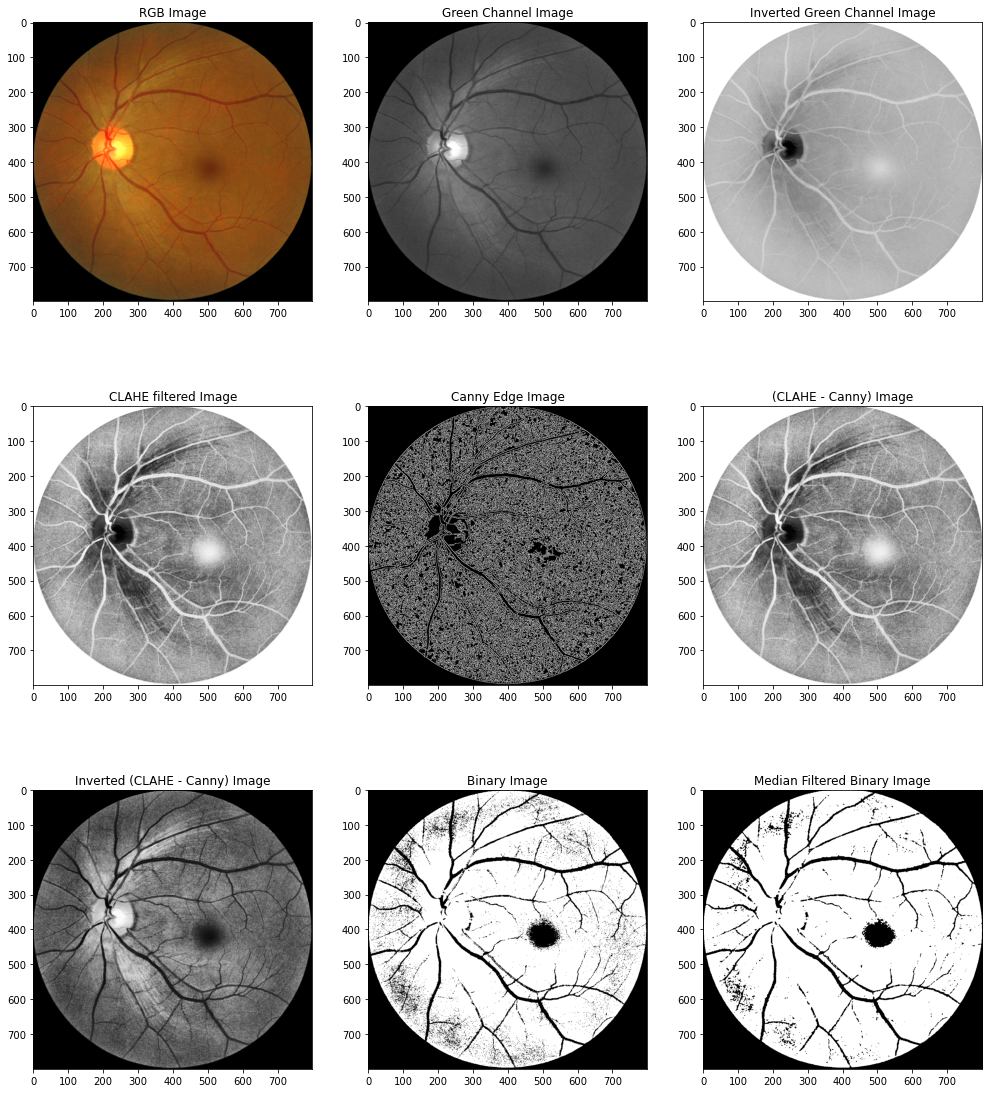

In [35]:
segment_vessels(path_1+sample_image_1)

## 2.) Segmenting Exudates

In [36]:
path_2 = "Messidor_Kaggle/Messidor/train_data/Severe/"

In [37]:
images = os.listdir(path_2)

### This function "segment_exudates" takes image as input and generates a series of images corresponding to each step used for segmenation of the hard/soft exudates.

In [30]:
def segment_exudates(path):
    """
    Here we are going to segment the Exudates by using certain filters.
    
    
    I followed this pipeline to segment the exudates:
    
    1.)  Convert the image from BGR to RGB color scale to view it correctly.
    2.)  Extract the green channel from the RGB image as green channel clearly seperates out the vessels and exudates in the 
         retina.
    3.)  Apply Morphological operations from opencv. Here I applied Closing operation. Closing is an operation that includes 
         Dilation followed by Erosion. Dilation means to increase the boundary areas and Erosion means to reduce/erode
         the boundary areas. Thus Closing helps in removing or closing the holes/black points in the objects.
    4.)  Convert the resulting image into a binary image using thresholding segment the exudate region.
    5.)  Use some shape to hide the optic disc. (We can mask the disc also)
    6.)  Then plot the final image in gray scale to view the segmented output.
    """
    
    # Step 1
    image_bgr = cv2.imread(path_temp+sample_image_2)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    # Step 2
    image_g = image_rgb[:,:,1]

    # Step 3
    kernel = np.ones((10,10))
    image_closing = cv2.morphologyEx(image_g, cv2.MORPH_CLOSE, kernel)

    # Step 4
    retval, binary = cv2.threshold(image_closing, 87, 200, cv2.THRESH_BINARY)

    # Step 5
    cv2.circle(binary, (135,420), 50, (0,0,0), -1)
    
    # Step 6
    f = plt.figure(figsize=(17,12))

    print(" ")
    f.add_subplot(2,2,1)
    plt.title("RGB Image")
    plt.imshow(image_rgb)
    
    f.add_subplot(2,2,2)
    plt.title("Green Channel Image")
    plt.imshow(image_g, cmap="gray")
    
    f.add_subplot(2,2,3)
    plt.title("Closing Image")
    plt.imshow(image_closing, cmap="gray")

    f.add_subplot(2,2,4)
    plt.title("Optic disc hidden Binary Image")
    plt.imshow(binary, cmap="gray")
    
    plt.show()

In [31]:
sample_image_2 = images[0]

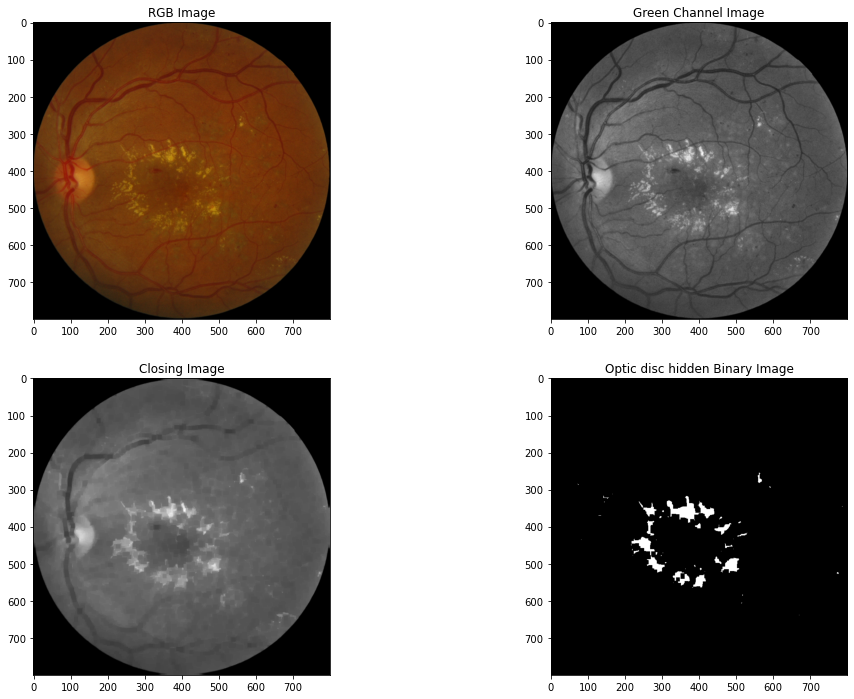

In [38]:
segment_exudates(path_2+sample_image_2)

## 3.) Segmenting Red Dots

In [64]:
path_3 = "Messidor_Kaggle/Messidor/train_data/Severe/"

In [65]:
images = os.listdir(path_3)

### This function "segment_red_dots" takes image as input and generates a series of images corresponding to each step used for segmenation of Microaneurysms.

In [369]:
def segment_red_dots(path):
    """
    Here we are going to segment the Microaneurysms and haemorrhages by using certain filters.
    
    
    I followed this pipeline to segment the them:
    
    1.)  Convert the image from BGR to RGB color scale to view it correctly.
    2.)  Extract the green channel from the RGB image as green channel clearly seperates out the vessels and dots in the 
         retina.
    3.)  To smoothen out the image and highlight the intensity rich regions we will apply the CLAHE filter(Contrast Limited
         Adaptive Histogram Equalization) 
         
    4.)  Apply the canny edge detector to detect the edges and intensity variations (gradients/changes in intensity).

    5.)  Apply Morphological operations from opencv. Here I applied Closing followed by Opening operation. 
         Closing is an operation that includes Dilation followed by Erosion. Dilation means to increase the boundary 
         areas and Erosion means to reduce/erode the boundary areas. 
         Opening is an operation that includes Erosion followed by Dilation. Erosion means to reduce/erode the boundary 
         areas and Dilation means to increase the boundary areas.     
         Thus Closing helps in removing or closing the holes/black points in the objects in the canny image.
         And Opening helps in catching the holes closed by Closing operation.
    
    6.)  Then plot the final image in gray scale to view the segmented output.
    """
    
    # Step 1
    img_bgr = cv2.imread(path_3 + sample_image_3)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # Step 2
    img_g = img_rgb[:,:,1]

    # Step 3
    clahe = cv2.createCLAHE(clipLimit = 6)
    img_clahe = clahe.apply(img_g)
    
    # Step 4
    img_edges = cv2.Canny(img_clahe, 130, 150)
    
    # Step 5
    # Closing
    kernel = np.ones((2,2))
    image_closing = cv2.morphologyEx(img_edges, cv2.MORPH_CLOSE, kernel)
    
    # Opening
    kernel = np.ones((5,5))
    image_opening = cv2.morphologyEx(image_closing, cv2.MORPH_OPEN, kernel)
    
    # Step 6
    f = plt.figure(figsize=(17,12))
    
    print(" ")
    f.add_subplot(2,3,1)
    plt.title("RGB Image")
    plt.imshow(img_rgb)
    
    f.add_subplot(2,3,2)
    plt.title("Green Channel Image")
    plt.imshow(img_g, cmap="gray")
    
    f.add_subplot(2,3,3)
    plt.title("CLAHE Filtered Image")
    plt.imshow(img_clahe, cmap="gray")
    
    f.add_subplot(2,3,4)
    plt.title("Canny Edge Image")
    plt.imshow(img_edges, cmap="gray")
    
    f.add_subplot(2,3,5)
    plt.title("Closing Image")
    plt.imshow(image_closing, cmap="gray")
    
    f.add_subplot(2,3,6)
    plt.title("Opening Image")
    plt.imshow(image_opening, cmap="gray")
    
    plt.show()

In [370]:
sample_image_3 = images[1]

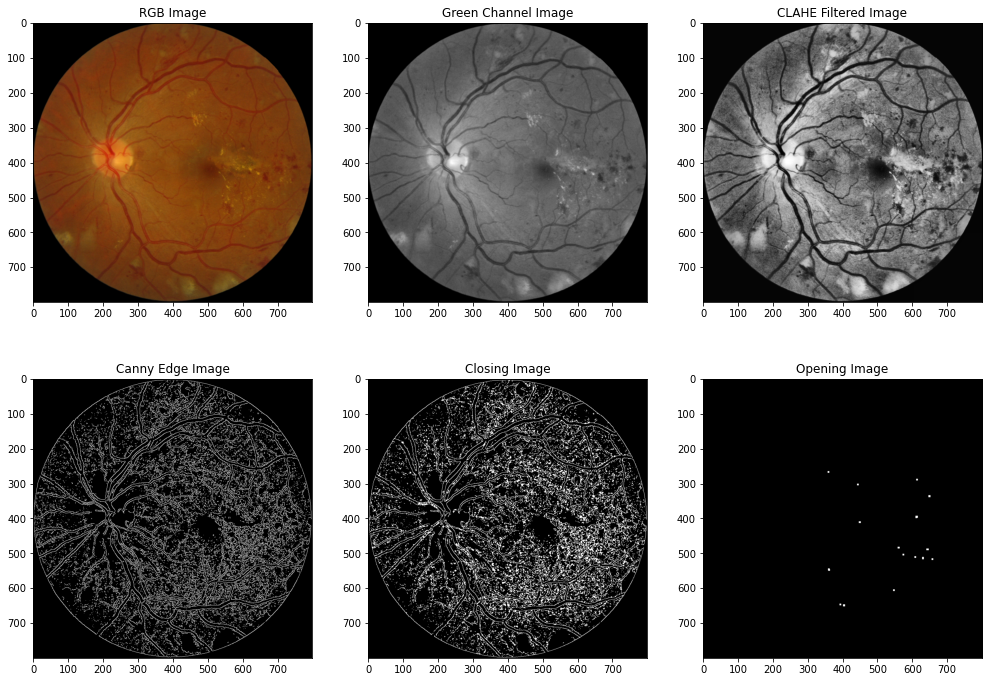

In [371]:
segment_red_dots(path_3+sample_image_3)